<a href="https://colab.research.google.com/github/ArnoldoOliva/Proyecto_SaturdaysAI/blob/master/Algoritmo_de_Soccer_Arnoldo_Oliva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [0]:
#Importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.base import clone 
from sklearn.preprocessing import MinMaxScaler
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew
from collections import OrderedDict
import time
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.decomposition import PCA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 112kB 9.6MB/s 


Using TensorFlow backend.


Importación de datos


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Datos originales

In [0]:
#Leer dataset de 115 columnas:
""" identificadores de partidos, ligas y equipos
posiciones/coordenadas (partidos en cuadrantes del campo) de jugadores de ambos equipos
variables que miden desempeño del jugador
momios de casas de apuestas"""


path = "/content/drive/My Drive/algoritmos/fut/match_copia.xlsx"
df = pd.read_excel(path)
df.head()

,id,country_id,date,season,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008-08-17,2008/2009,1,1,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,2008-08-16,2008/2009,1,1,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,2008-08-16,2008/2009,1,1,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,2008-08-17,2008/2009,1,1,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,2008-08-16,2008/2009,1,1,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


# Tratamiento de datos

In [0]:
#crear 3 variables dependientes, el total de goles dependiente de la suma de ambos equipos, y dos puntos de corte, las 3 variables son de acuerdo a un criterio de apuesta:

df['total goals']=df['home_team_goal']+df['away_team_goal']
df['altas 2.5']=(df['total goals']>2.5)
df['altas 3.5']=(df['total goals']>3.5)
df.shape

(25979, 118)

In [0]:
 ## se identifican el tipo de variables 

 # print(df.dtypes)
pd.set_option('display.max_rows', 120)
print(df.dtypes)

id                           int64
country_id                   int64
date                datetime64[ns]
season                      object
league_id                    int64
stage                        int64
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
home_player_X1             float64
home_player_X2             float64
home_player_X3             float64
home_player_X4             float64
home_player_X5             float64
home_player_X6             float64
home_player_X7             float64
home_player_X8             float64
home_player_X9             float64
home_player_X10            float64
home_player_X11            float64
away_player_X1             float64
away_player_X2             float64
away_player_X3             float64
away_player_X4             float64
away_player_X5             float64
away_player_X6             float64
away_player_X7      

In [0]:
#quitar columnas que no son numericas, las cuales las mayorías son las de identificación y otras que fueron strings
a_quitar=['id','country_id','date','season','league_id','stage','match_api_id','home_team_api_id','away_team_api_id','goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
a_quitar
df=df.drop(a_quitar, axis=1)
df.shape #(25979,101)
#df.head()

(25979, 101)

In [0]:
 #se confirma de nuevo el tipo de variables
 # print(df.dtypes)
pd.set_option('display.max_rows', 120)
print(df.dtypes)

home_team_goal       int64
away_team_goal       int64
home_player_X1     float64
home_player_X2     float64
home_player_X3     float64
home_player_X4     float64
home_player_X5     float64
home_player_X6     float64
home_player_X7     float64
home_player_X8     float64
home_player_X9     float64
home_player_X10    float64
home_player_X11    float64
away_player_X1     float64
away_player_X2     float64
away_player_X3     float64
away_player_X4     float64
away_player_X5     float64
away_player_X6     float64
away_player_X7     float64
away_player_X8     float64
away_player_X9     float64
away_player_X10    float64
away_player_X11    float64
home_player_Y1     float64
home_player_Y2     float64
home_player_Y3     float64
home_player_Y4     float64
home_player_Y5     float64
home_player_Y6     float64
home_player_Y7     float64
home_player_Y8     float64
home_player_Y9     float64
home_player_Y10    float64
home_player_Y11    float64
away_player_Y1     float64
away_player_Y2     float64
a

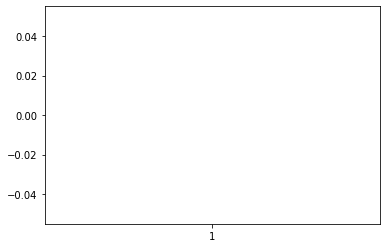

In [0]:
#boxplot of all variables, primer ejemplo
plt.figure()
plt.boxplot(df['IWD'],'gD')
plt.show()

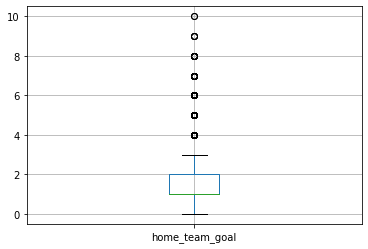

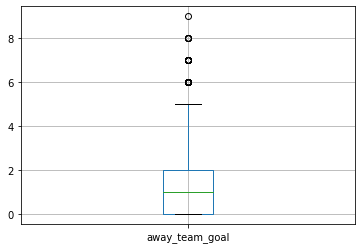

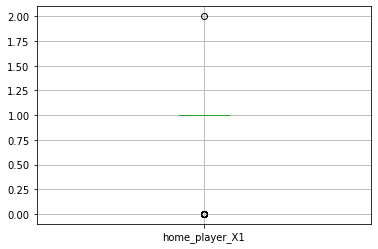

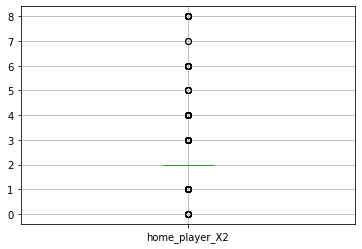

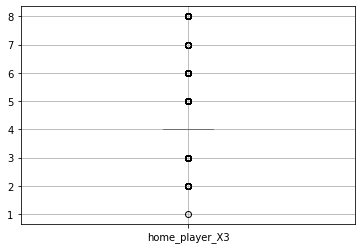

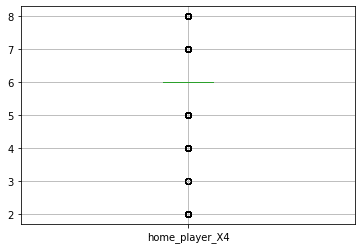

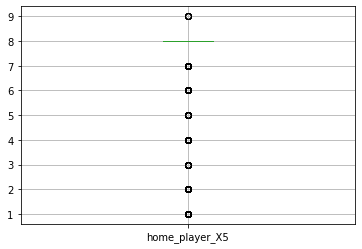

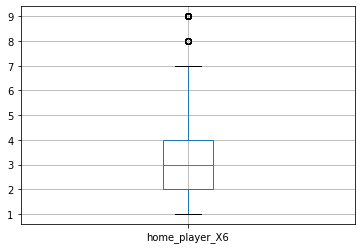

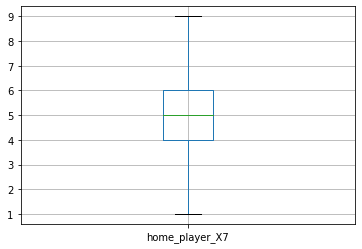

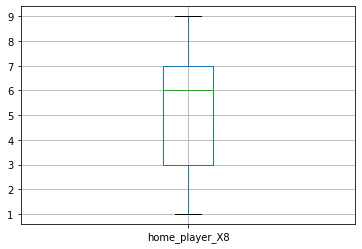

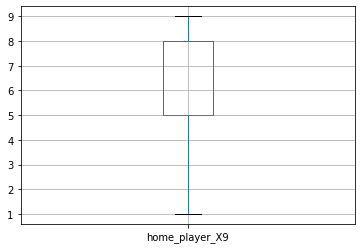

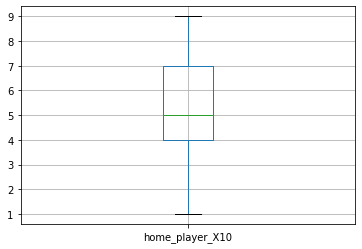

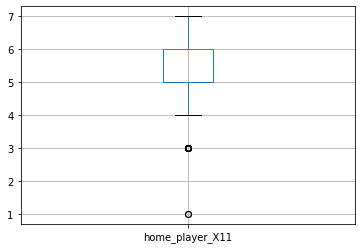

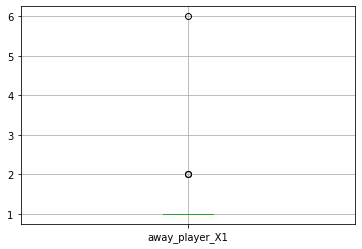

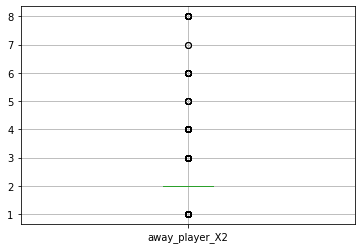

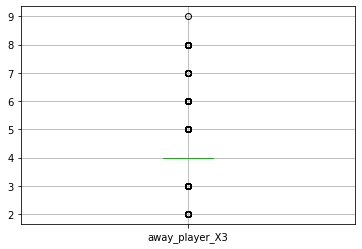

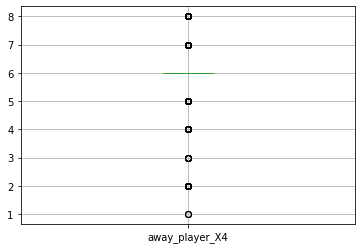

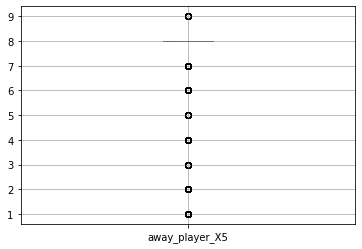

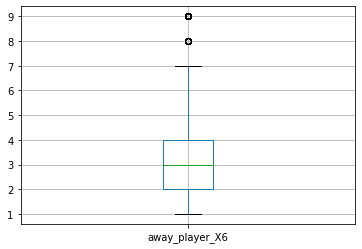

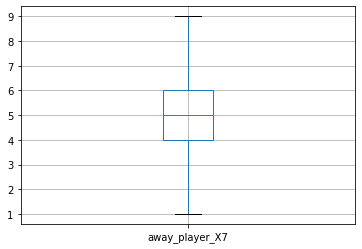

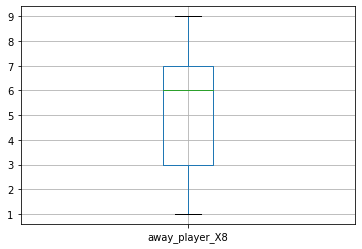

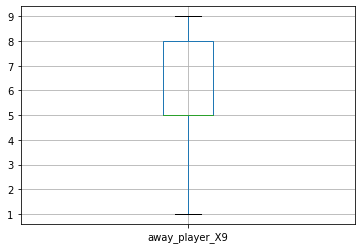

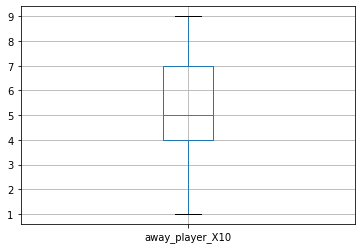

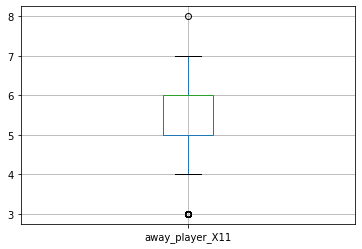

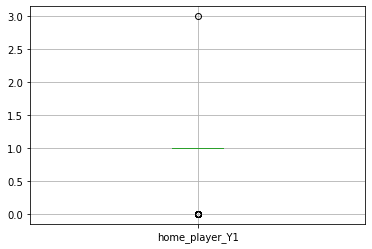

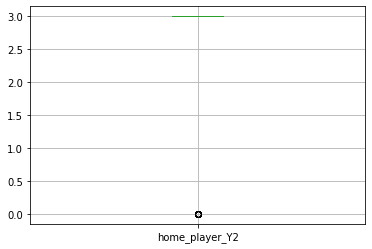

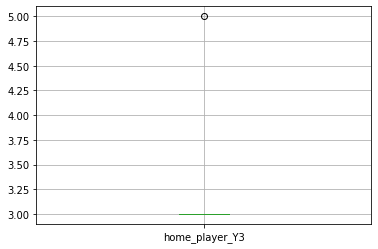

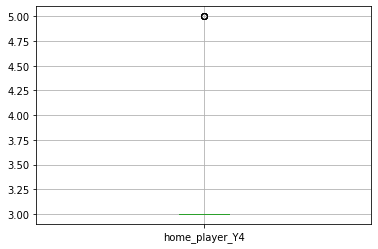

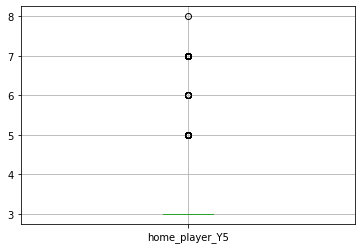

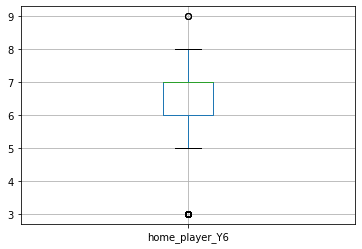

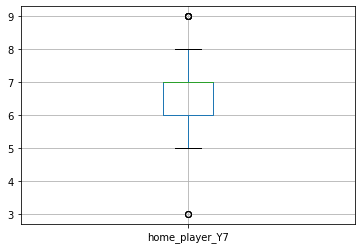

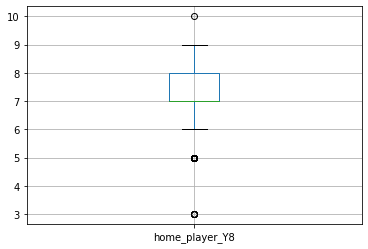

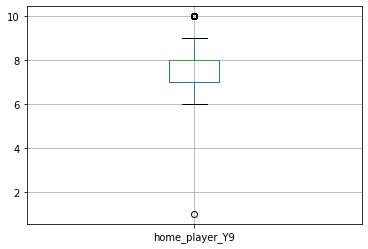

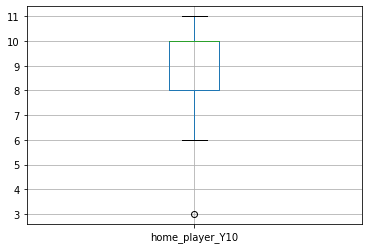

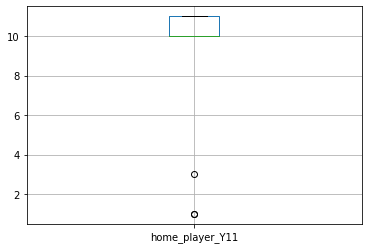

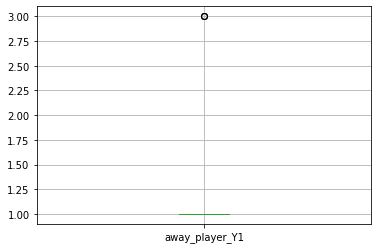

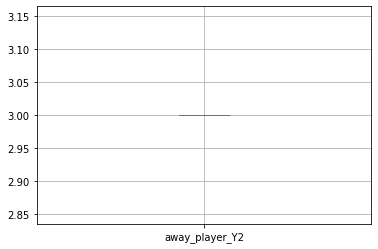

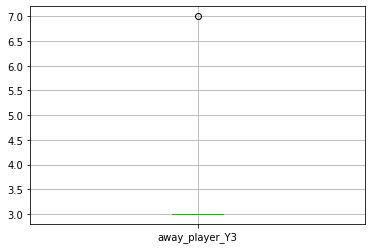

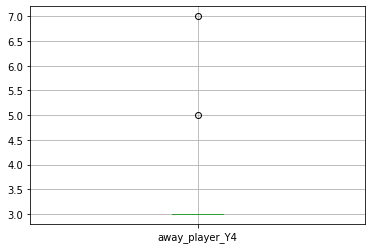

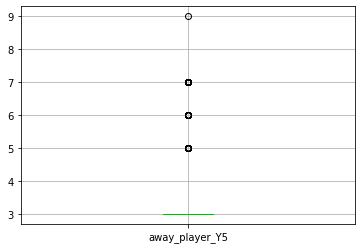

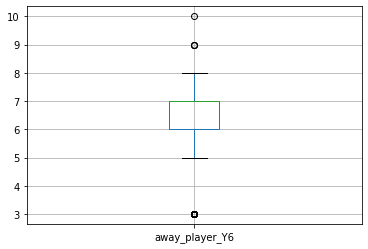

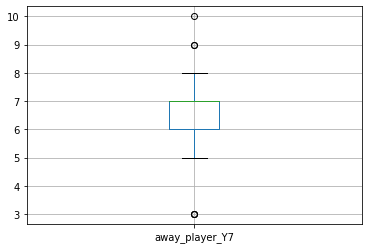

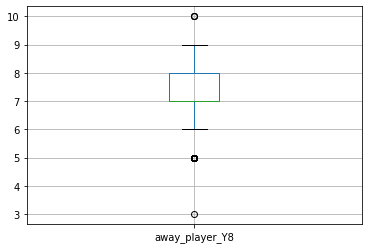

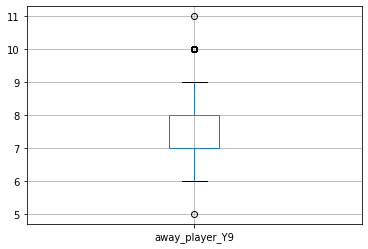

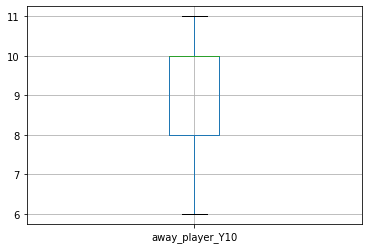

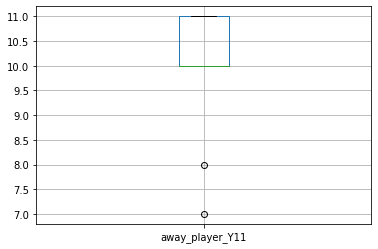

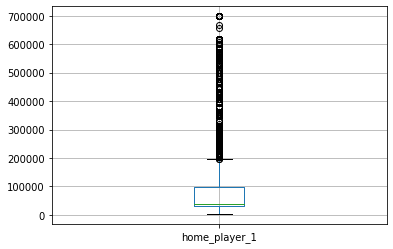

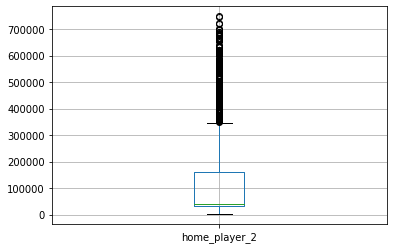

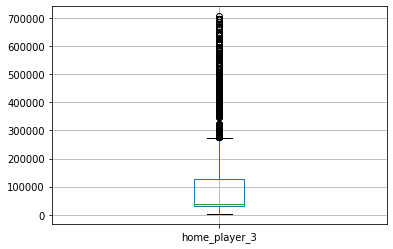

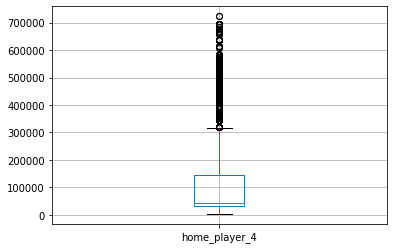

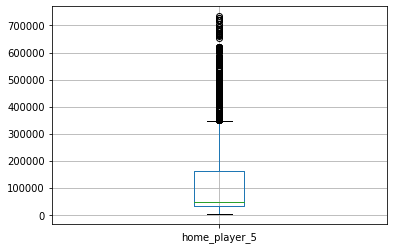

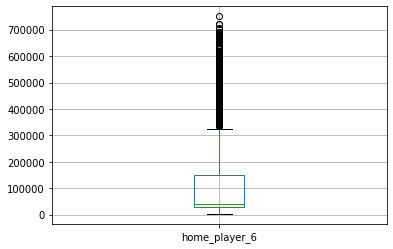

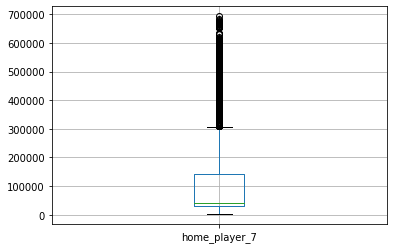

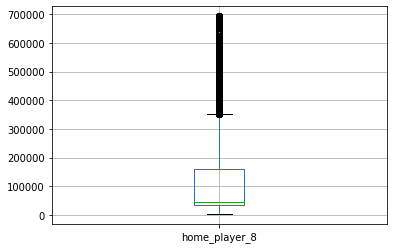

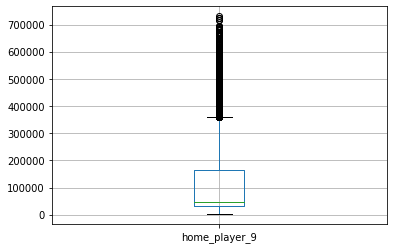

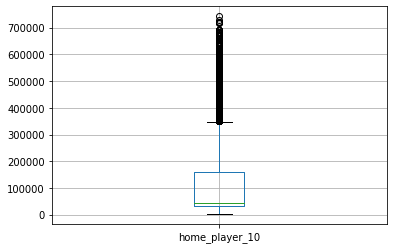

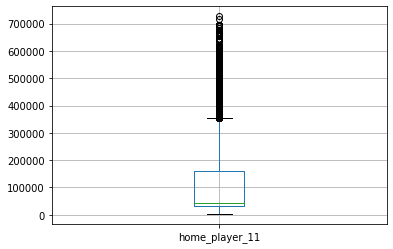

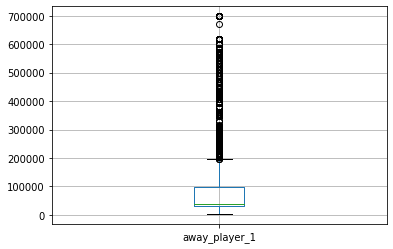

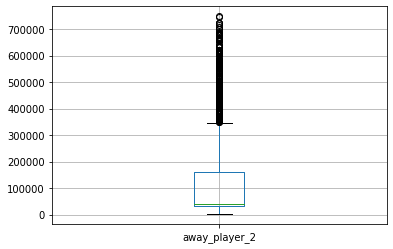

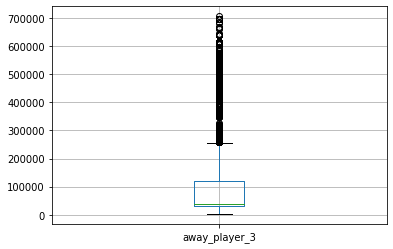

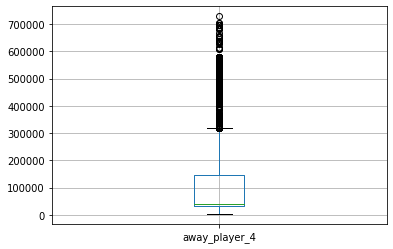

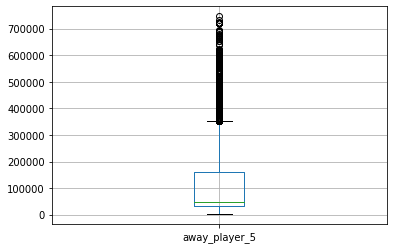

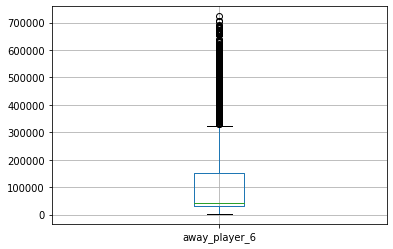

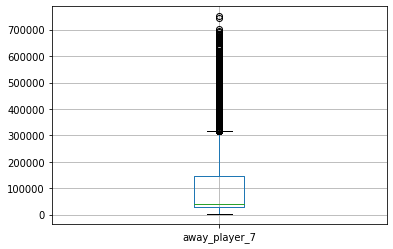

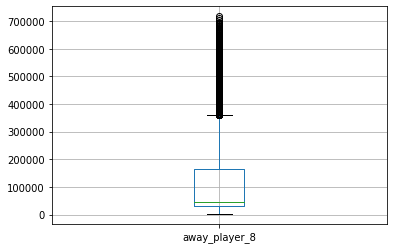

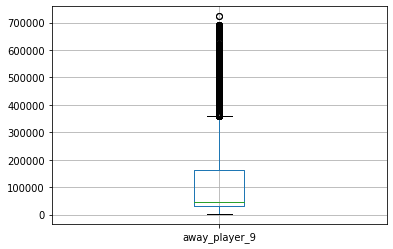

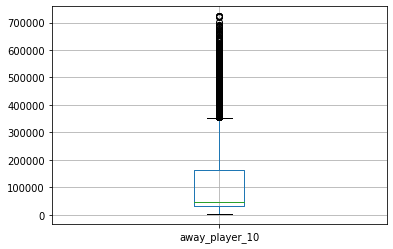

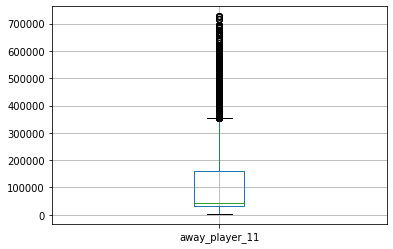

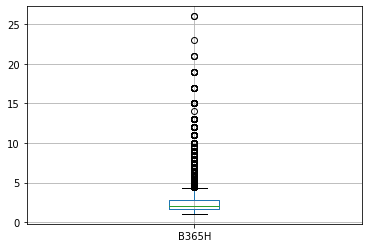

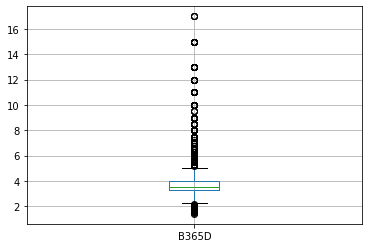

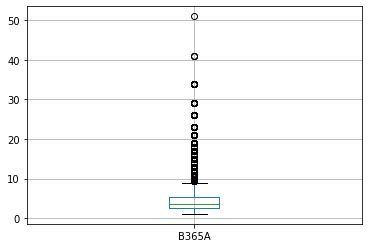

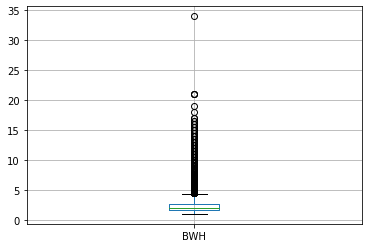

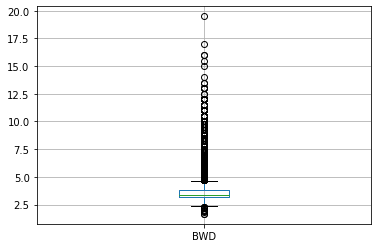

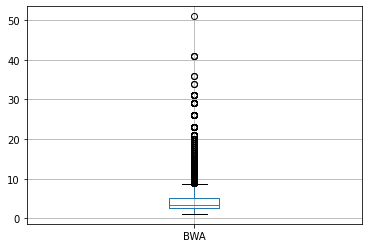

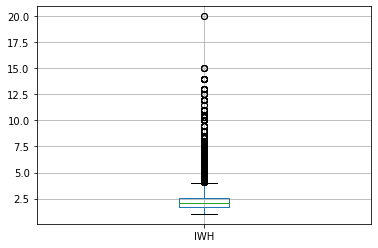

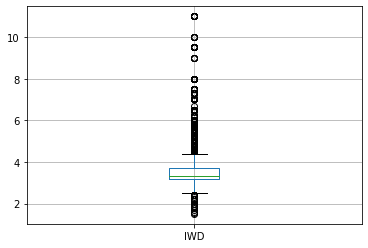

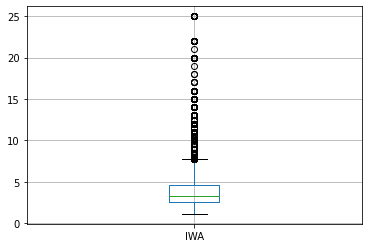

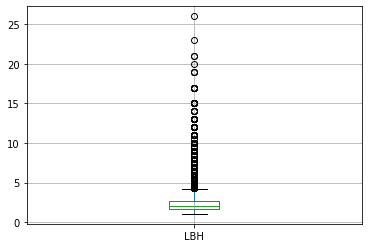

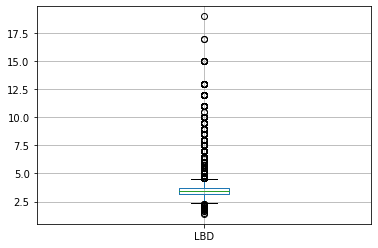

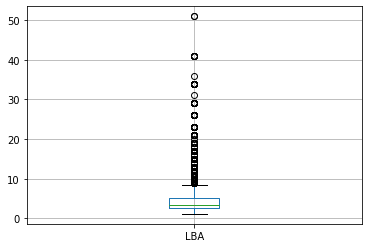

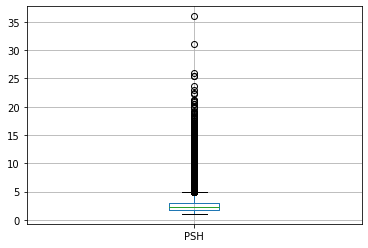

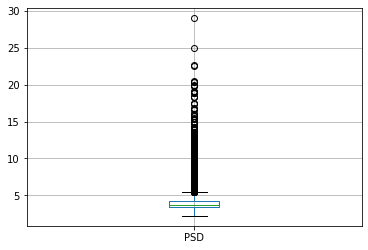

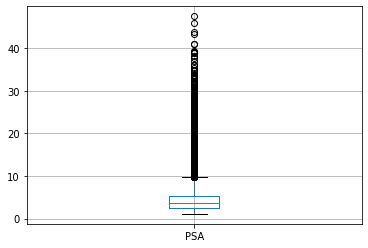

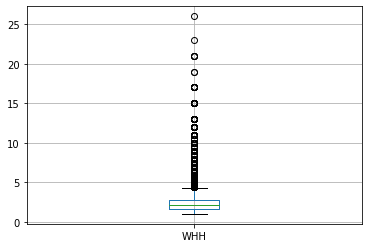

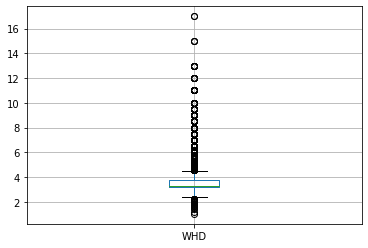

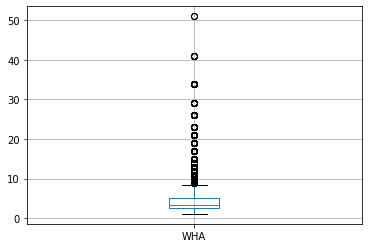

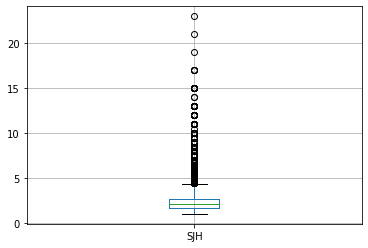

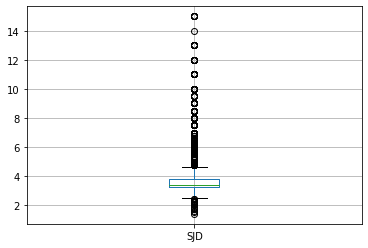

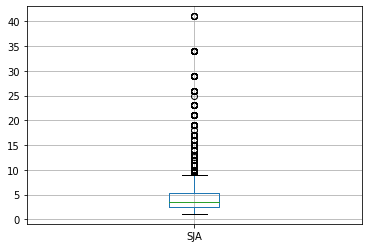

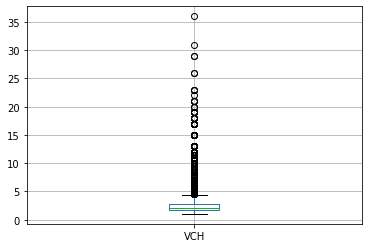

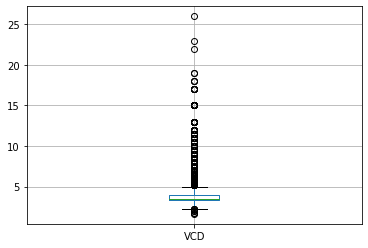

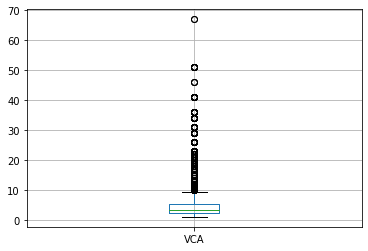

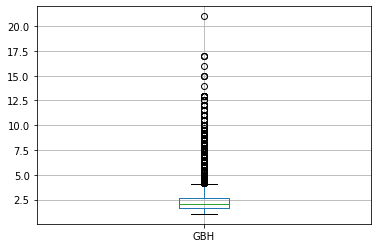

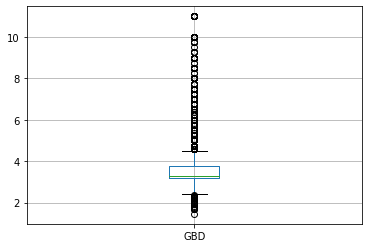

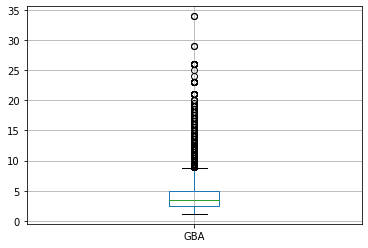

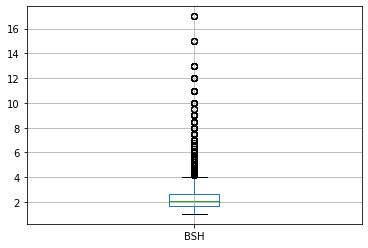

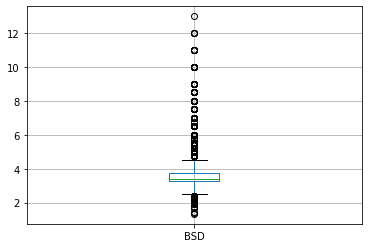

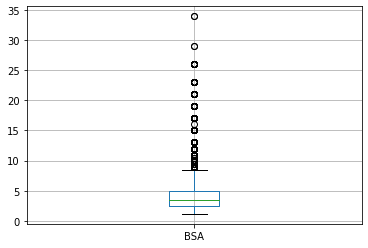

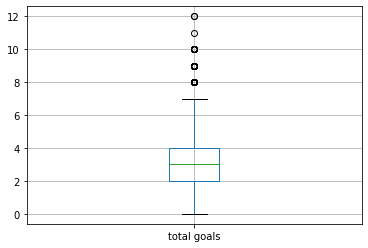

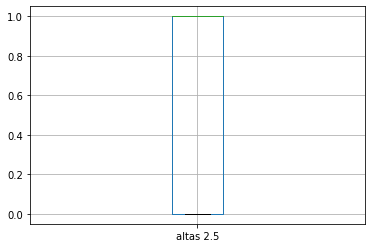

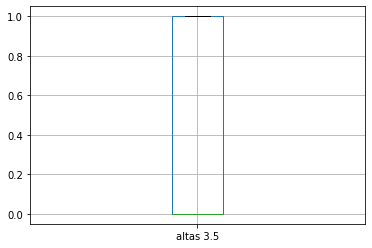

In [0]:
#boxplot for each column #boxplot para cada variable


for column in df:
    plt.figure()
    df.boxplot([column])

In [0]:
#### se tratan los valores nulos 

#suma del total de nulos

sum(df.isna().sum())    #313322 NaNs
df.isna().sum()



(25979, 101)

In [0]:
#se identifican las variables que tienen menos del 15% de valores nulos

(df.isna().sum())>3897
df.shape #(25979, 101)

In [0]:
# Aqui quitamos las columnas que tienen más del 15% de valores nulos (3897 nulos)
#25979*.15 #=not more than 3897 NaNs

list_na=['PSH','PSD','PSA','SJH','SJD','SJA','GBH','GBD','GBA','BSH','BSD','BSA','home_team_goal','away_team_goal']
df1=df.drop(list_na, axis=1)
df1.shape #(25979, 87)

(25979, 87)

In [0]:
#replace the remaining variables with NaN with their Means

df1=df1.fillna(df1.mean())
df1.isna().sum()

home_player_X1     0
home_player_X2     0
home_player_X3     0
home_player_X4     0
home_player_X5     0
home_player_X6     0
home_player_X7     0
home_player_X8     0
home_player_X9     0
home_player_X10    0
home_player_X11    0
away_player_X1     0
away_player_X2     0
away_player_X3     0
away_player_X4     0
away_player_X5     0
away_player_X6     0
away_player_X7     0
away_player_X8     0
away_player_X9     0
away_player_X10    0
away_player_X11    0
home_player_Y1     0
home_player_Y2     0
home_player_Y3     0
home_player_Y4     0
home_player_Y5     0
home_player_Y6     0
home_player_Y7     0
home_player_Y8     0
home_player_Y9     0
home_player_Y10    0
home_player_Y11    0
away_player_Y1     0
away_player_Y2     0
away_player_Y3     0
away_player_Y4     0
away_player_Y5     0
away_player_Y6     0
away_player_Y7     0
away_player_Y8     0
away_player_Y9     0
away_player_Y10    0
away_player_Y11    0
home_player_1      0
home_player_2      0
home_player_3      0
home_player_4

In [0]:
#Descripción de las variables
df1.describe()


,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,...,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,total goals
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.00000,25979.000000,25979.0,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,...,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.000290,2.074585,4.058558,6.052222,7.525490,3.195387,4.742660,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,...,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.870660,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970,2.628818,3.839699,4.662282,2.559263,3.747612,4.397000,2.467625,3.608946,4.150622,2.536217,3.711753,4.385403,2.578749,3.665325,4.482633,2.668126,3.899066,4.840345,2.705531
std,0.021489,0.373368,0.372114,0.430010,1.551886,1.189316,1.053164,1.626790,1.897869,1.438495,0.732312,0.032238,0.389082,0.373150,0.432313,1.578849,1.237956,1.078076,1.626741,1.886806,1.485978,0.736086,0.024027,0.061719,0.012408,0.027744,0.906713,0.713419,0.567428,0.567801,1.086016,1.035335,0.48762,0.021491,0.0,0.024817,0.027746,0.921094,0.729233,0.565443,...,109731.872728,100138.801525,100138.336981,109893.605913,108633.620845,104491.879399,111604.288829,113338.491979,108401.940747,105455.830091,85327.176622,110924.959407,98881.918782,101171.138438,109523.207848,108023.334625,104776.021640,113315.064010,113476.328889,109235.721766,106889.488117,1.673398,1.042822,3.478440,1.526899,0.963380,3.068987,1.345960,0.748170,2.661774,1.528740,0.935372,3.166483,1.571265,0.893007,3.341653,1.797671,1.163388,4.024850,1.672456
min,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.00000,1.000000,3

Partición de datos

In [0]:
#Delimitación de variables dependiente y se sacan las variables que en este momento no se analizaran

y1=df1['total goals']
another_ys=df1[['altas 2.5','altas 3.5',]]
another_ys
y1

0        2
1        0
2        3
3        5
4        4
        ..
25974    1
25975    3
25976    2
25977    0
25978    7
Name: total goals, Length: 25979, dtype: int64

In [0]:
#a fin de que no existan 0 goles, debido a que esto representa un problema
#para las métricas de ejecución del modelo
y1=y1+1
y1

0        3
1        1
2        4
3        6
4        5
        ..
25974    2
25975    4
25976    3
25977    1
25978    8
Name: total goals, Length: 25979, dtype: int64

In [0]:
#se retiran otras variables dependientes que no son las objetivo del modelo.

df2=df1.drop(another_ys,axis=1)
#df2=df1.drop(y, axis=1)
df2=df2.drop('total goals',1)
df2.shape  #(84 columnas)
df2.head()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,...,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.00029,2.074585,4.058558,6.052222,7.52549,3.195387,4.74266,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,...,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,1.70,3.30,4.33,1.65,3.40,4.50
1,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.00029,2.074585,4.058558,6.052222,7.52549,3.195387,4.74266,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,...,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,1.83,3.30,3.60,2.00,3.25,3.25
2,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.00029,2.074585,4.058558,6.052222,7.52549,3.195387,4.74266,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,...,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,2.50,3.25,2.40,2.35,3.25,2.65
3,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.00029,2.074585,4.058558,6.052222,7.52549,3.195387,4.74266,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,...,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,1.44,3.75,6.00,1.45,3.75,6.50
4,0.999586,2.073516,4.06100

In [0]:
#Partición de datos

x_train, x_test, y_train, y_test=train_test_split(df2,y1, test_size=.20, random_state=40)


Creación del Modelo de Random Forest Regressor

In [0]:
# Para recapitular

"""se usan 84 variables, 25979 registros, donde de estas variables se excluyeron
variables de identificación, otras variables que no pudieron ser convertidas a numeros 
-eran strings- que pretendían estadísticas de los partidos como tiros de esquina, tiros de meta,
y otras variables de momios de las casas de apuesta que se perdieron por tener muchos
valores nulos. En total se perdieron 31 variables, pero se dejaron el resto de
variables de:

momios de casas de apuestas
posición en cuadrantes de los jugadores de ambos equipos
variables de rendimiento de jugadores de ambos equipos"""

In [0]:
#RANDOM FOREST REGRESSOR, modelo 1

# crear modelo con # decision trees
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 40,min_samples_leaf=10,oob_score=True,)
 #Entrenar el modelo en training data
rfr.fit(x_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=40, verbose=0, warm_start=False)

modelo 1, RFR

In [0]:
#Predict del RFR, modelo 1

# Usar el método predict de Random Forest Regressor
predictions = rfr.predict(x_test)
# Calcular los errores absolutos
errors = abs(predictions - y_test)
mae=round(np.mean(errors),2)
# Imprimir el error absoluto medio -mean absolute error- (mae)
print('Mean Absolute Error:', mae)
#Mean Absolute Error: 1.31 


Mean Absolute Error: 1.31


In [0]:
#Performance del RFR, modelo 1

# Calcular el mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calcular y imprimir un accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 48.593 %.

Accuracy: 48.59 %.


In [0]:
#feature importance
rfr.feature_importances_


array([1.23615396e-04, 2.64576969e-04, 3.64930429e-04, 2.99747230e-04,
       7.83553384e-04, 2.76645984e-03, 3.24019612e-03, 3.75529253e-03,
       3.95323044e-03, 3.58893694e-03, 1.22866679e-03, 5.12046481e-06,
       2.35705327e-04, 4.90178966e-04, 7.60396172e-04, 8.50245581e-04,
       3.16477266e-03, 3.24487219e-03, 3.85431505e-03, 4.70287422e-03,
       3.58602119e-03, 1.35687615e-03, 1.46997896e-04, 1.35241436e-04,
       3.03292972e-04, 3.40362684e-03, 2.82008022e-04, 1.57921423e-03,
       1.39204640e-03, 1.02318689e-03, 2.34530636e-03, 1.59707206e-03,
       1.30808268e-03, 3.97140009e-05, 0.00000000e+00, 1.20047851e-04,
       1.36600192e-04, 2.99434316e-04, 1.77338134e-03, 1.45800804e-03,
       1.10995806e-03, 2.60209504e-03, 2.31155212e-03, 1.27746395e-03,
       2.96041121e-02, 3.32291571e-02, 3.30542050e-02, 3.31045757e-02,
       3.26551481e-02, 3.25955104e-02, 3.40364007e-02, 3.35314076e-02,
       3.36426886e-02, 3.45758228e-02, 3.40853742e-02, 3.11680302e-02,
      

In [0]:
#Convertir el feature importance en data frame para que sea más sencillo de visualizar

feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
away_player_6,0.034753
away_player_10,0.034743
home_player_10,0.034576
away_player_9,0.034092
home_player_11,0.034085
home_player_7,0.034036
away_player_7,0.033656
home_player_9,0.033643
away_player_4,0.033540
home_player_8,0.033531


Modelo 2, de  Random Forest Regressor -menos variables, las significativas de acuerdo al modelo anterior-

In [0]:
#RFR MODELO 2 -con menos variables, las más significativas-

#delimitar nuevas variables

#SE RETIRAN LAS PRIMERAS 44 VARIABLES QUE COINCIDENTEMENTE NO FUERON RELEVANTES EN EL MODELO ANTERIOR
df_less_v=df1.drop(df1.iloc[:,0:44], axis=1)
df_less_v.shape

(25979, 43)

In [0]:
df_less_v.head()

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,total goals,altas 2.5,altas 3.5
0,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,1.70,3.30,4.33,1.65,3.40,4.50,2,False,False
1,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,1.83,3.30,3.60,2.00,3.25,3.25,0,False,False
2,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,2.50,3.25,2.40,2.35,3.25,2.65,3,True,False
3,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,1.44,3.75,6.00,1.45,3.75,6.50,5,True,True
4,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.87066,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.87697,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,4.20,3.40,1.70,4.50,3.40,1.65,4,True,True


In [0]:
#SE RETIRAN DEMÁS VARIABLES QUE NO SON OBJETIVO EN EL MODELO

df_less_v.drop(['total goals','altas 2.5','altas 3.5','LBD','BWA','VCA','IWD','IWA','LBA','BWH','WHA','LBH','WHH','IWH','B365A', 'B365H'], axis=1, inplace=True)
df_less_v.head()
#df_less_v.shape #27 columnas

(25979, 27)

In [0]:
#split de datos
x_train2, x_test2, y_train2, y_test2=train_test_split(df_less_v,y1, test_size=.20, random_state=40)


In [0]:
#RFR CON MENOS VARIABLES, MODELO 2

rfr2 = RandomForestRegressor(n_estimators = 1000, random_state = 40,min_samples_leaf=10,oob_score=True)
rfr2.fit(x_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=40, verbose=0, warm_start=False)

In [0]:
#Predict del RFR, modelo 2

# Usar el método predict de Random Forest Regressor
predictions2 = rfr2.predict(x_test2)
# Calcular los errores absolutos
errors2 = abs(predictions2 - y_test2)
mae2=round(np.mean(errors2),2)
# Imprimir el error absoluto medio -mean absolute error- (mae)
print('Mean Absolute Error:', mae2)
#Mean Absolute Error: 1.31 .


Mean Absolute Error: 1.31


In [0]:
#Performance del RFR, modelo 2

# Calcular el mean absolute percentage error (MAPE)
mape2 = 100 * (errors2 / y_test2)
# Calcular y imprimir un accuracy
accuracy2 = 100 - np.mean(mape2)
print('Accuracy:', round(accuracy2, 4), '%.')
#Accuracy: 48.59 %.

Accuracy: 48.5954 %.


xGBoosting tree decision regressor


In [0]:
#Establecer modelo y entrenar
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=40) 

model.fit(x_train,y_train)

[18:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=40, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
#predict de XgBoosting
predictionsXGB = model.predict(x_test)

# Calcular los errores absolutos
errorsXGB = abs(predictionsXGB - y_test)
maeXGB = round(np.mean(errorsXGB), 2)
# Imprimir el error absoluto medio -mean absolute error- (mae)
print('Mean Absolute Error:', maeXGB)
#Mean Absolute Error: 1.4 .

Mean Absolute Error: 1.4


In [0]:
#Ejecución del modelo xgboosting
# Calcular el mean absolute percentage error (MAPE)
mapeXGB = 100 * (errorsXGB / y_test)
# Calcular y imprimir un accuracy
accuracyXGB = 100 - np.mean(mapeXGB)
print('Accuracy:', round(accuracyXGB, 4), '%.')
#Accuracy: 46.2013 %.

Accuracy: 46.2013 %.


In [0]:
#ejecutar un feat importance para ver si tiene resultados similares al anterior, y usarlo en nuevo modelo
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))


OrderedDict([('home_player_9', 2552),
             ('away_player_6', 2539),
             ('away_player_9', 2511),
             ('away_player_7', 2493),
             ('away_player_8', 2469),
             ('home_player_8', 2414),
             ('home_player_10', 2409),
             ('away_player_10', 2394),
             ('home_player_4', 2385),
             ('home_player_7', 2384),
             ('home_player_6', 2372),
             ('away_player_3', 2349),
             ('home_player_11', 2323),
             ('away_player_5', 2298),
             ('home_player_3', 2281),
             ('away_player_11', 2261),
             ('away_player_4', 2259),
             ('home_player_5', 2239),
             ('home_player_2', 2186),
             ('away_player_2', 2166),
             ('away_player_1', 1940),
             ('home_player_1', 1916),
             ('BWA', 904),
             ('VCH', 800),
             ('BWH', 793),
             ('BWD', 790),
             ('IWA', 738),
             ('WHH', 710)

In [0]:
#quitar variables no relevantes de acuerdo al criterio anterior
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 650).keys())
print(most_relevant_features)

['B365A', 'IWA', 'home_player_11', 'home_player_5', 'WHH', 'away_player_10', 'VCD', 'VCH', 'away_player_1', 'home_player_4', 'VCA', 'BWD', 'home_player_3', 'home_player_1', 'BWA', 'away_player_8', 'away_player_3', 'home_player_10', 'away_player_2', 'away_player_6', 'home_player_9', 'away_player_5', 'away_player_7', 'home_player_2', 'home_player_8', 'away_player_11', 'B365H', 'away_player_4', 'home_player_7', 'home_player_6', 'away_player_9', 'BWH']


Segundo modelo XGBoost

In [0]:
#Segundo modelo xGBoosting con mejores features -variables-, de acuerdo al primer XgBoosting Model
x_trainXG=x_train[most_relevant_features] 
x_trainXG.shape #32 columnas
x_trainXG


,B365A,IWA,home_player_11,home_player_5,WHH,away_player_10,VCD,VCH,away_player_1,home_player_4,VCA,BWD,home_player_3,home_player_1,BWA,away_player_8,away_player_3,home_player_10,away_player_2,away_player_6,home_player_9,away_player_5,away_player_7,home_player_2,home_player_8,away_player_11,B365H,away_player_4,home_player_7,home_player_6,away_player_9,BWH
8276,17.000000,15.000000,30638.0,121633.000000,1.140000,25730.000000,7.000000,1.120000,26335.000000,94886.000000,21.000000,7.000000,33085.0,32653.000000,14.500,26388.000000,109615.000000,30764.000000,9079.000000,37087.0,116772.0,23587.0,36771.000000,30894.0,30477.000000,37313.00000,1.170000,26894.0,38244.0,30834.0,27512.0,1.150000
13218,5.000000,4.500000,166648.0,288613.000000,1.750000,107149.115943,3.700000,1.700000,39477.000000,362195.000000,6.000000,3.600000,24970.0,41466.000000,5.500,434778.000000,118616.000000,47041.000000,169752.000000,211091.0,72656.0,293235.0,108401.000000,39555.0,127460.000000,279392.00000,1.730000,128456.0,24507.0,72518.0,270774.0,1.730000
12389,1.620000,1.600000,35575.0,210704.000000,6.000000,154249.000000,3.700000,6.500000,32746.000000,103266.000000,1.670000,3.600000,282420.0,42478.000000,1.620,41433.000000,46875.000000,34633.000000,34305.000000,96398.0,41326.0,362195.0,30682.000000,24414.0,71768.000000,37950.00000,6.000000,22337.0,24405.0,27672.0,264842.0,5.750000
16226,4.662282,4.150622,206792.0,109527.842071,2.578749,107149.115943,3.899066,2.668126,114822.000000,94540.204494,4.840345,3.747612,72543.0,76638.362432,4.397,79241.000000,91126.781293,105612.508373,107614.617424,69541.0,34264.0,50657.0,97898.056014,13376.0,40973.000000,104932.87697,2.628818,151050.0,9086.0,112656.0,69242.0,2.559263
17143,4.662282,4.150622,69229.0,275726.000000,2.578749,69061.000000,3.899066,2.668126,76628.199879,118822.000000,4.840345,3.747612,238529.0,69382.000000,4.397,109265.114214,13474.000000,105612.508373,210978.000000,277905.0,20118.0,190010.0,406505.000000,173993.0,429880.000000,69637.00000,2.628818,69553.0,116885.0,33804.0,30526.0,2.559263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,5.250000,5.600000,38578.0,37426.000000,1.530000,45605.000000,3.500000,1.600000,96613.000000,30750.000000,5.500000,3.650000,2977.0,30855.000000,5.500,41469.000000,74663.000000,34233.000000,75239.000000,37419.0,30273.0,115229.0,11555.000000,37667.0,107290.992947,21785.00000,1.600000,6864.0,33655.0,33665.0,43329.0,1.550000
23992,2.000000,2.000000,45204.0,150296.000000,4.000000,246438.000000,3.500000,4.100000,96623.000000,280485.000000,2.000000,3.200000,113311.0,282680.000000,2.000,213483.000000,2768.000000,38581.000000,79737.000000,242094.0,38469.0,574200.0,193978.000000,150316.0,434325.000000,41157.00000,4.000000,160844.0,254702.0,202220.0,262592.0,3.900000
14501,2.000000,1.900000,17855.0,196221.000000,3.200000,102290.000000,3.600000,3.600000,112107.000000,110113.000000,2.050000,3.600000,26671.0,118848.000000,1.910,209384.000000,104482.000000,71764.000000,188555.000000,97470.0,142186.0,185554.0,26590.000000,264860.0,17761.000000,45860.00000,3.500000,212511.0,158861.0,67958.0,109061.0,3.600000
14555,2.880000,2.700000,266526.0,161012.000000,2.500000,42598.000000,3.600000,2.450000,26484.000000,46078.000000,2.800000,3.300000,160599.0,26002.000000,2.700,114558.000000,42704.000000,143512.000000,26785.000000,38244.0,78409.0,240205.0,108038.000000,299514.0,157723.000000,46104.00000,2.380000,78908.0,32937.0,103899.0,158581.0,2.350000


In [0]:
#Se crea el modelo con variables más relevantes

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=40)
best_xgb_model.fit(x_trainXG,y_train)


[17:11:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=40, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
x_testXG=x_test[most_relevant_features]

In [0]:
#predict de XgBoosting
predictionsXGBet = best_xgb_model.predict(x_testXG)

# Calcular los errores absolutos
errorsXGBet = abs(predictionsXGBet - y_test)
maeXGBet =round(np.mean(errorsXGBet), 2)
# Imprimir el error absoluto medio -mean absolute error- (mae)
print('Mean Absolute Error:', maeXGBet )
#Mean Absolute Error: 1.4 .

Mean Absolute Error: 1.4


In [0]:
#Ejecución del modelo xgboosting
# Calcular el mean absolute percentage error (MAPE)
mapeXGBet = 100 * (errorsXGBet / y_test)
# Calcular y imprimir un accuracy
accuracyXGBet = 100 - np.mean(mapeXGBet)
print('Accuracy:', round(accuracyXGBet, 4), '%.')
#Accuracy: 46.2329 %.

Accuracy: 46.2329 %.


# Comparativa y Conclusiones

Comparativa de los 4 modelos

In [0]:
comparativa={
    "RFR, modelo 1":[mae, accuracy],
    "RFR, modelo 2 (menos variables)":[mae2, accuracy2],
    "xGBoosting": [maeXGB , accuracyXGB],
    "xgBoosting Better": [maeXGBet, accuracyXGBet]
}

comparacion = pd.DataFrame([comparativa], columns=comparativa.keys())
comparacion

,"RFR, modelo 1","RFR, modelo 2 (menos variables)",xGBoosting,xgBoosting Better
0,"[1.31, 48.59304361470397]","[1.31, 48.59539682388975]","[1.4, 46.20128794998564]","[1.4, 46.23293244192448]"


De acuerdo a las conclusiones de la comparativa entre modelos, se puede decir que, gracias a un mejor -menor- Mean Absolute Error, y a un mayor accuracy, ambos modelos de Random Forest Regressor (el primero de 84 variables, y el segundo de 27 variables, eliminando las que no eran tan relevantes para el modelo), son los mejores (El RFR de 27 variables es un poco mejor que el primero, pero por cifras decimales inperceptibles). 

 El que hayan tenido casi exactamente los mismos resultados puede decir que las variables eliminadas no eran determinantes en lo absoluto para el modelo. 



In [0]:
#Referencias

#feature importance https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
#XGBoostingRegressor https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression#Preparing-the-dataset
#NA Treatment https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456
#RF https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#regresión lineal https://datatofish.com/multiple-linear-regression-python/
#pca https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

